# Faster RCNN for Images in Google Colab using cv2.dnn module | **Object Detection using Opencv python**

In [1]:
!git clone https://github.com/DatumLearning/Faster_RCNN_Opencv.git

Cloning into 'Faster_RCNN_Opencv'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 18 (delta 3), reused 0 (delta 0), pack-reused 8
Unpacking objects: 100% (18/18), 57.35 MiB | 15.17 MiB/s, done.


In [2]:
import numpy as np
import random
import time
import cv2
import os
from google.colab.patches import cv2_imshow


In [3]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [4]:
weightsPath = "/content/Faster_RCNN_Opencv/frozen_inference_graph.pb"
configPath = "/content/Faster_RCNN_Opencv/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"

In [5]:
net = cv2.dnn.readNetFromTensorflow(weightsPath, configPath)

In [6]:
image = cv2.imread("/content/Faster_RCNN_Opencv/doggo.jpg")
(H, W) = image.shape[:2]

In [7]:
blob = cv2.dnn.blobFromImage(image, swapRB=True, crop=False)

In [8]:
net.setInput(blob)

In [9]:
boxes = net.forward(["detection_out_final"])

In [10]:
output = boxes[0].squeeze()

In [11]:
output

array([[ 0.        , 17.        ,  0.8920537 ,  0.16641064,  0.3825718 ,
         0.4217565 ,  0.9071655 ],
       [ 0.        ,  1.        ,  0.87509423,  0.17307138,  0.23415676,
         0.7514136 ,  0.7281058 ],
       [ 0.        ,  2.        ,  0.85852927,  0.60989845,  0.14240737,
         0.9072679 ,  0.29413992],
       [ 0.        , 16.        ,  0.5722487 ,  0.17602229,  0.36656022,
         0.42700827,  0.93689704],
       [ 0.        ,  7.        ,  0.3091164 ,  0.61198306,  0.14173536,
         0.90506196,  0.2957927 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.    

In [12]:
output[: , 2][:5] , output[: , 1][:5]


(array([0.8920537 , 0.87509423, 0.85852927, 0.5722487 , 0.3091164 ],
       dtype=float32),
 array([17.,  1.,  2., 16.,  7.], dtype=float32))

In [13]:
output[: , 3:][:5]

array([[0.16641064, 0.3825718 , 0.4217565 , 0.9071655 ],
       [0.17307138, 0.23415676, 0.7514136 , 0.7281058 ],
       [0.60989845, 0.14240737, 0.9072679 , 0.29413992],
       [0.17602229, 0.36656022, 0.42700827, 0.93689704],
       [0.61198306, 0.14173536, 0.90506196, 0.2957927 ]], dtype=float32)

In [14]:
num = np.argwhere(output[: , 2] > 0.8).shape[0]

In [15]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [16]:
img = cv2.imread("/content/Faster_RCNN_Opencv/doggo.jpg")
for i in range(num):
  x1n , y1n , x2n , y2n = output[i , 3:]
  x1 = int(x1n * W)
  y1 = int(y1n * H)
  x2 = int(x2n * W)
  y2 = int(y2n * H)
  img = cv2.rectangle(img , (x1 , y1) , (x2 , y2) , (0 , 255 , 0) , 3)
  class_name = coco_names[int(output[i , 1])]
  img = cv2.putText(img , class_name , (x1 , y1 - 10) , font , 0.5 ,
                    (255 , 0 , 0) , 1 , cv2.LINE_AA)

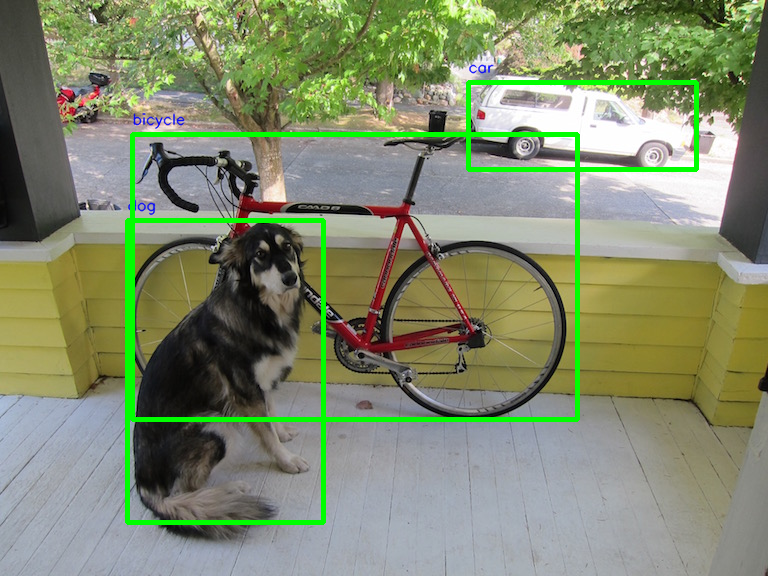

In [17]:
cv2_imshow(img)

So,in abone is the implementation of **Faster RCNN for Images** using cv2.dnn module *italicised text*
